In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\putta\Desktop\PYTHON\.DataSets\LoansData.csv")
df

,LoanID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,1,20000.0,20000.00,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,2,19200.0,19200.00,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,3,35000.0,35000.00,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,4,10000.0,9975.00,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,5,12000.0,12000.00,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,30000.0,29950.00,16.77%,60 months,debt_consolidation,19.23%,NY,MORTGAGE,9250.00,705-709,15.0,45880.0,1.0,8 years
2496,2497,16000.0,16000.00,14.09%,60 months,home_improvement,21.54%,MD,OWN,8903.25,740-744,18.0,18898.0,1.0,10+ years
2497,2498,10000.0,10000.00,13.99%,36 months,debt_consolidation,4.89%,PA,MORTGAGE,2166.67,680-684,4.0,4544.0,0.0,10+ years
2498,2499,6000.0,6000.00,12.42%,36 months,major_purchase,16.66%,NJ,RENT,3500.00,675-679,8.0,7753.0,0.0,5 years


# Data Dictionary 

In [3]:
df.columns

Index(['LoanID', 'Amount.Requested', 'Amount.Funded.By.Investors',
       'Interest.Rate', 'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio',
       'State', 'Home.Ownership', 'Monthly.Income', 'FICO.Range',
       'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
       'Inquiries.in.the.Last.6.Months', 'Employment.Length'],
      dtype='object')

In [4]:
print('Nmuber of the Rows:    ',df.shape[0])
print('Nmuber of the Columns: ',df.shape[1])
print('Shape of the Data:     ',df.shape)
print('Size of the data:      ',df.size)
print('Unique variable is:    ','LoanID')

Nmuber of the Rows:     2500
Nmuber of the Columns:  15
Shape of the Data:      (2500, 15)
Size of the data:       37500
Unique variable is:     LoanID


In [5]:
df.columns= [val.replace('.','_') for val in df.columns]

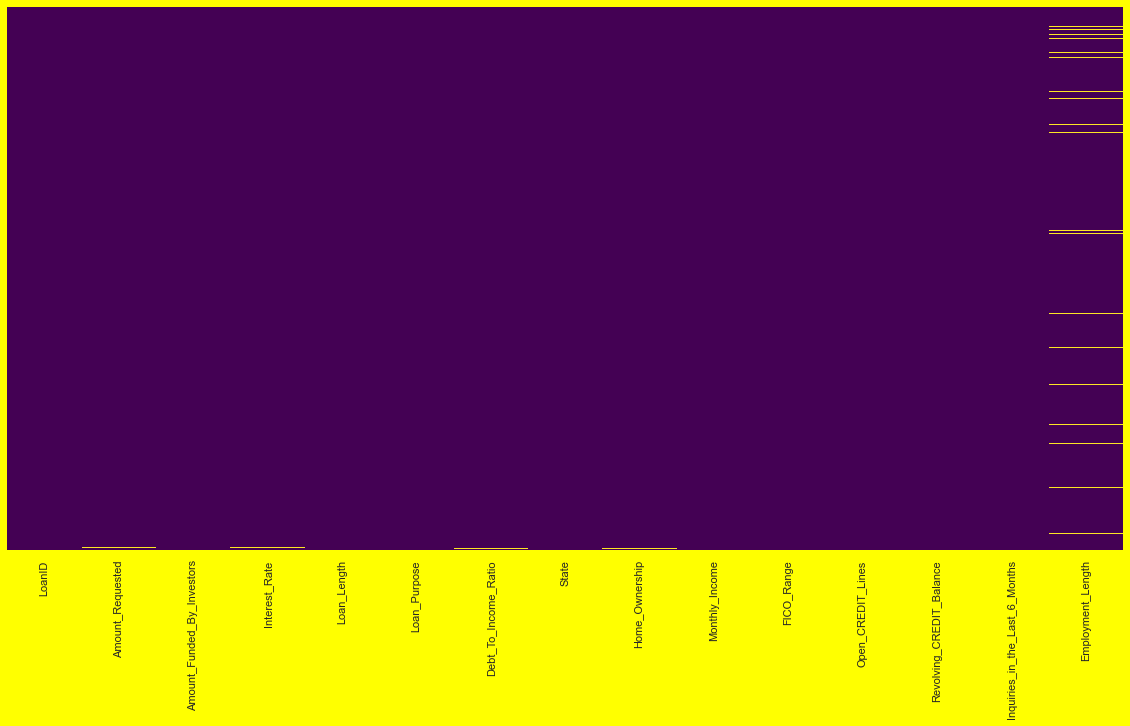

In [6]:
plt.figure(figsize=(20,10),facecolor='yellow')
sns.set(style='white')
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.show()

In [7]:
df.isnull().sum()*100/df.isnull().sum().sum()

LoanID                             0.000000
Amount_Requested                   1.052632
Amount_Funded_By_Investors         1.052632
Interest_Rate                      2.105263
Loan_Length                        0.000000
Loan_Purpose                       0.000000
Debt_To_Income_Ratio               1.052632
State                              0.000000
Home_Ownership                     1.052632
Monthly_Income                     1.052632
FICO_Range                         2.105263
Open_CREDIT_Lines                  3.157895
Revolving_CREDIT_Balance           3.157895
Inquiries_in_the_Last_6_Months     3.157895
Employment_Length                 81.052632
dtype: float64

In [8]:
# Get the number of null values and data type for each column
Unique_counts=df.nunique()
Null_counts = df.isnull().sum()
Not_null_counts=df.notnull().sum()
data_types = df.dtypes

# Combine the results into a single DataFrame
result = pd.concat([data_types,Unique_counts,Not_null_counts,Null_counts], axis=1, keys=['Data_Type','Unique_counts','Not_null','Num_Nulls'])

# Print the result
print(pd.DataFrame(result))

                               Data_Type  Unique_counts  Not_null  Num_Nulls
LoanID                             int64           2500      2500          0
Amount_Requested                 float64            380      2499          1
Amount_Funded_By_Investors       float64            710      2499          1
Interest_Rate                     object            275      2498          2
Loan_Length                       object              2      2500          0
Loan_Purpose                      object             14      2500          0
Debt_To_Income_Ratio              object           1669      2499          1
State                             object             46      2500          0
Home_Ownership                    object              5      2499          1
Monthly_Income                   float64            632      2499          1
FICO_Range                        object             38      2498          2
Open_CREDIT_Lines                float64             29      2497          3

In [9]:
df['Interest_Rate']=df['Interest_Rate'].apply(lambda x :float(str(x).split('%')[0]))
df['Loan_Length']=df['Loan_Length'].apply(lambda x :(str(x).split('months')[0]))
df['Debt_To_Income_Ratio']=df['Debt_To_Income_Ratio'].apply(lambda x :float(str(x).split('%')[0]))
df['Avg_FICO_Sore']=(pd.to_numeric(df['FICO_Range'].str.split('-',expand=True)[0])+pd.to_numeric(df['FICO_Range'].str.split('-',expand=True)[1]))/2
df.drop('FICO_Range',axis=1,inplace=True)
df['Employment_Length']=df['Employment_Length'].apply(lambda x: float(str(x).replace('<','').replace('+','').replace('years','').replace('year','')))

In [10]:
Unique_counts=df.nunique()
Null_counts = df.isnull().sum()
Not_null_counts=df.notnull().sum()
data_types = df.dtypes

# Combine the results into a single DataFrame
result = pd.concat([data_types,Unique_counts,Not_null_counts,Null_counts], axis=1, keys=['Data_Type','Unique_counts','Not_null','Num_Nulls'])

# Print the result
print(pd.DataFrame(result))

                               Data_Type  Unique_counts  Not_null  Num_Nulls
LoanID                             int64           2500      2500          0
Amount_Requested                 float64            380      2499          1
Amount_Funded_By_Investors       float64            710      2499          1
Interest_Rate                    float64            275      2498          2
Loan_Length                       object              2      2500          0
Loan_Purpose                      object             14      2500          0
Debt_To_Income_Ratio             float64           1669      2499          1
State                             object             46      2500          0
Home_Ownership                    object              5      2499          1
Monthly_Income                   float64            632      2499          1
Open_CREDIT_Lines                float64             29      2497          3
Revolving_CREDIT_Balance         float64           2349      2497          3

In [11]:
for val in df.select_dtypes(include='object').columns:
    print('\n' + val )
    print('\n'+'number of Groups:', df[val].nunique())
    print('\n' + 'These are all different Groups:' ,'\n', df[val].value_counts())
    


Loan_Length

number of Groups: 2

These are all different Groups: 
 36     1952
60      548
Name: Loan_Length, dtype: int64

Loan_Purpose

number of Groups: 14

These are all different Groups: 
 debt_consolidation    1307
credit_card            444
other                  201
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 39
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan_Purpose, dtype: int64

State

number of Groups: 46

These are all different Groups: 
 CA    433
NY    255
TX    174
FL    169
IL    101
GA     98
PA     96
NJ     94
VA     78
MA     73
OH     71
MD     68
NC     64
CO     61
WA     58
CT     50
AZ     46
MI     45
MN     38
AL     38
MO     33
NV     32
OR     30
SC     28
WI     26
KY     23
LA     22
OK     21
KS     21
UT     16
NH     15
RI     15
WV     15

In [12]:
# from the above we can say that state has nearly 46 states we can delete this varibles it has more than 20 subgroups
# inside so it will not show an impact to our model building

# Does data have Outliers? /Understand Distribution of data

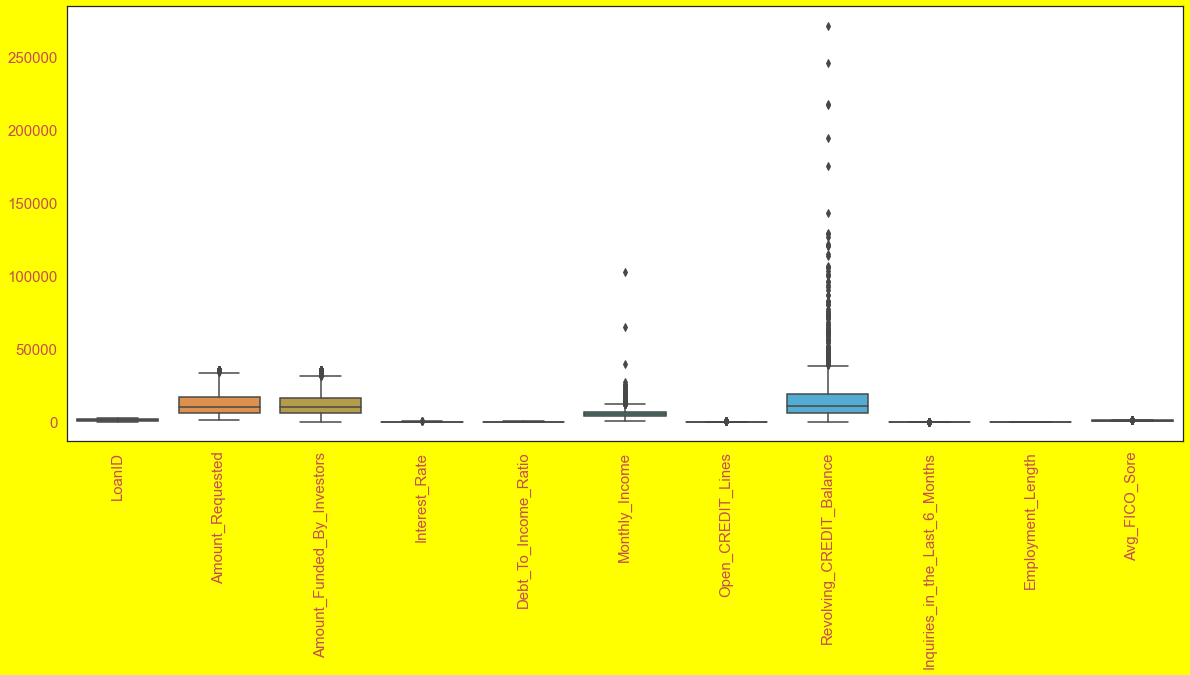

In [13]:
plt.figure(figsize=(20,8),facecolor='yellow')
sns.set(style='white')
sns.boxplot(data=df.select_dtypes(include=[int,float]))
plt.xticks(rotation=90,fontsize=15,color='r')
plt.yticks(rotation=0,fontsize=15,color='r')
plt.show()

# Does data have Duplicate records

In [14]:
df[df.duplicated()]
# there in no duplicates in the data

,LoanID,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Loan_Purpose,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,Avg_FICO_Sore


In [15]:
df.select_dtypes(include=[object])

,Loan_Length,Loan_Purpose,State,Home_Ownership
0,36,debt_consolidation,SC,MORTGAGE
1,36,debt_consolidation,TX,MORTGAGE
2,60,debt_consolidation,CA,MORTGAGE
3,36,debt_consolidation,KS,MORTGAGE
4,36,credit_card,NJ,RENT
...,...,...,...,...
2495,60,debt_consolidation,NY,MORTGAGE
2496,60,home_improvement,MD,OWN
2497,36,debt_consolidation,PA,MORTGAGE
2498,36,major_purchase,NJ,RENT


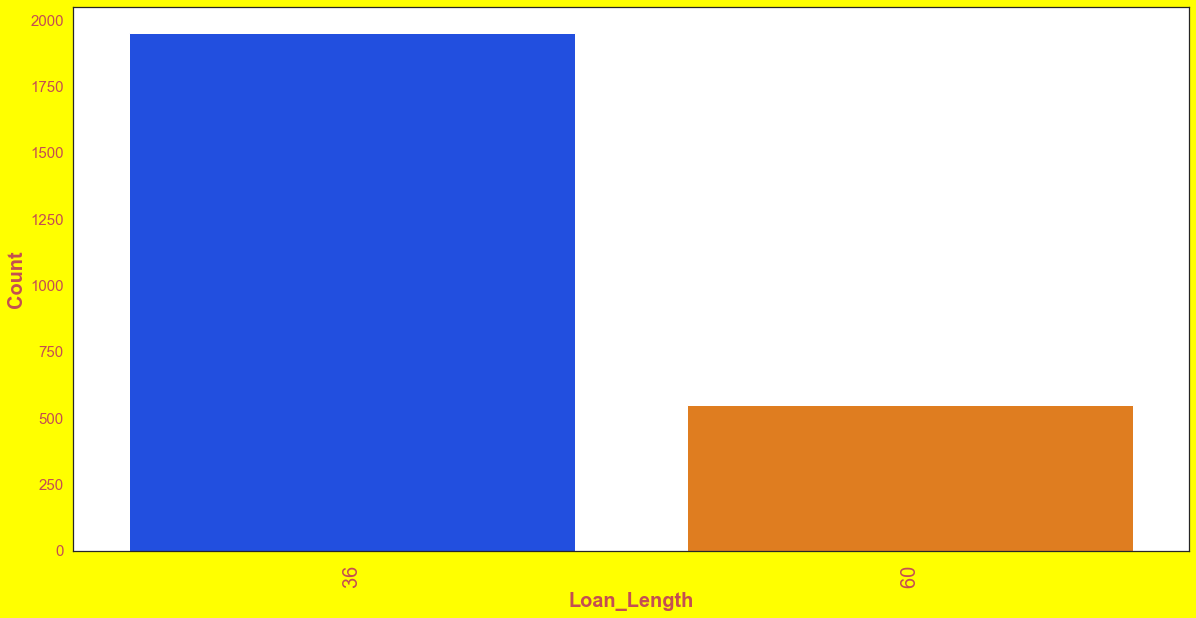

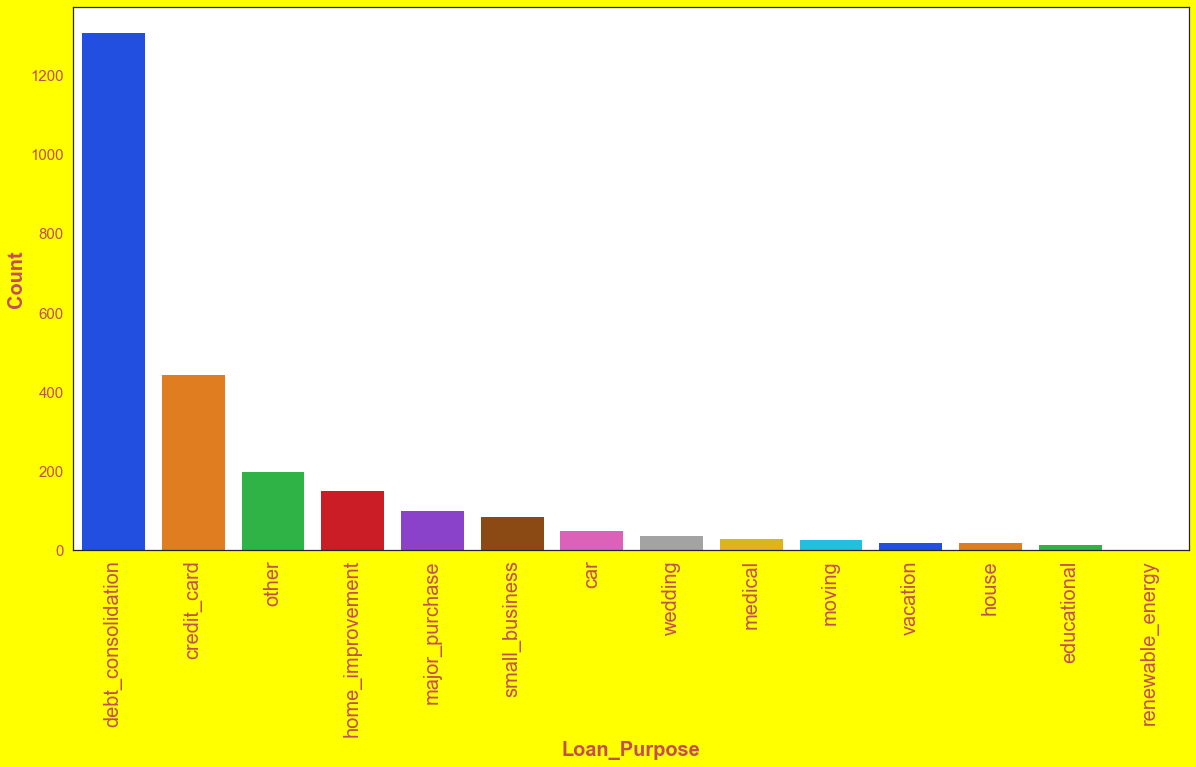

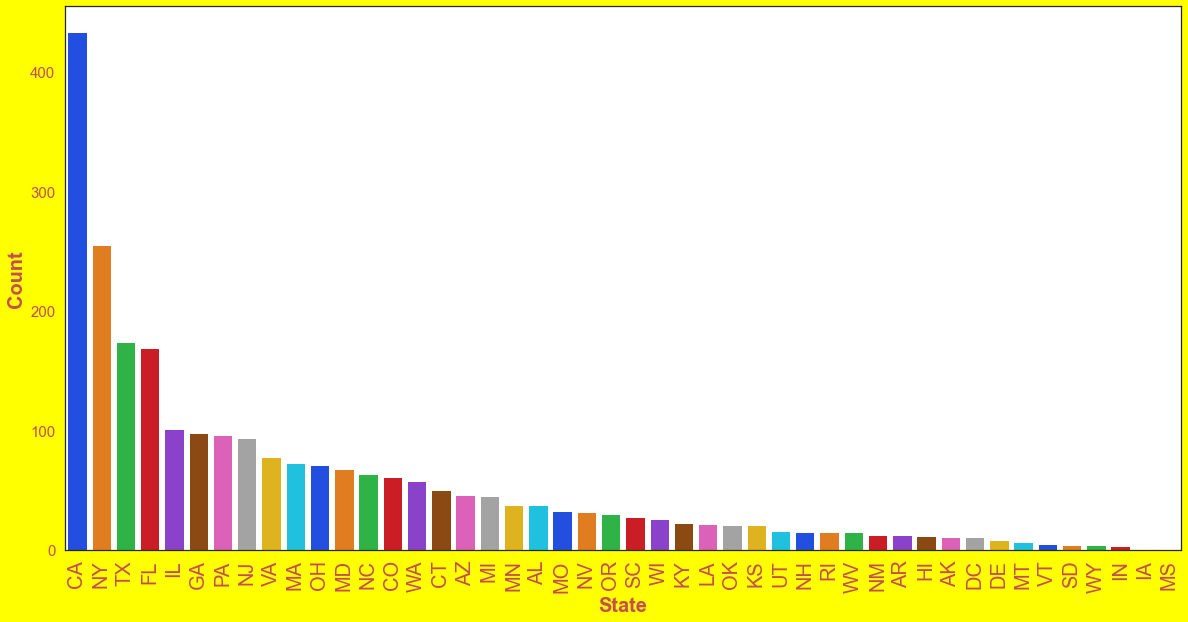

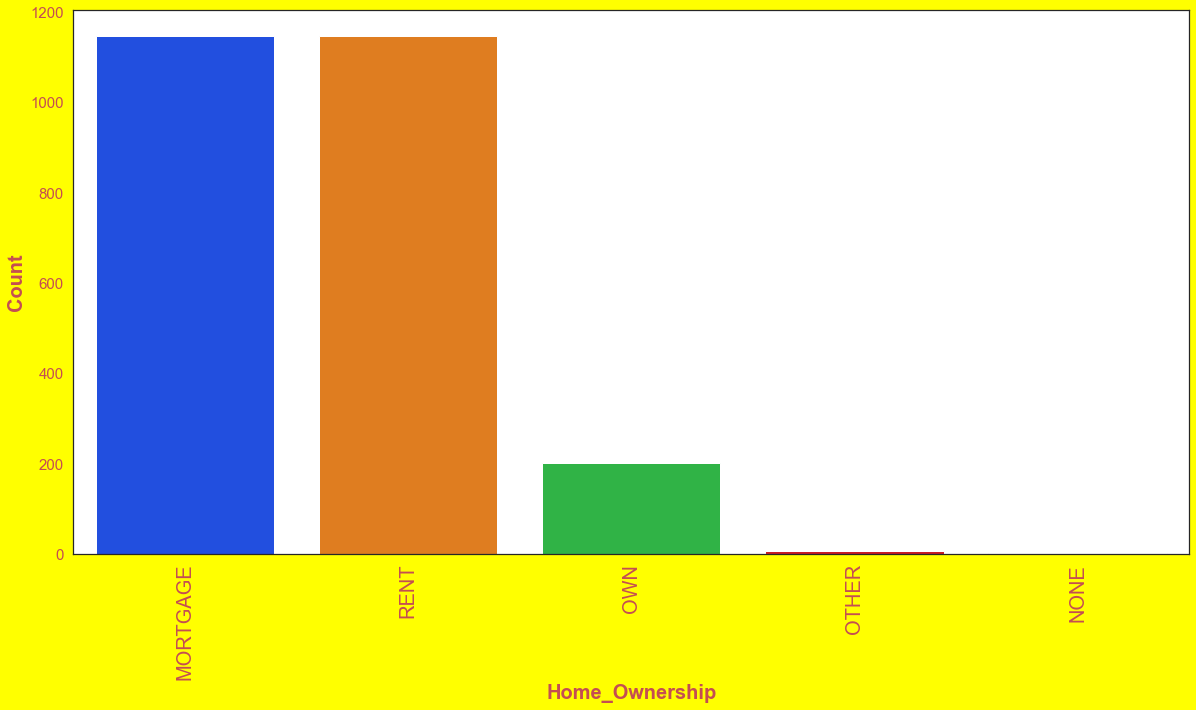

In [16]:
for val in df.select_dtypes(include=[object]):
    fequency_Table=df[val].value_counts()
    a=pd.DataFrame(fequency_Table).reset_index().rename({'index':val,val:'Count'},axis=1)
    plt.figure(figsize=(20,10),facecolor='yellow')
    sns.set(style='white')
    colors = sns.color_palette('bright')[0:5]
    sns.barplot(data=a,x=a.columns[0],y=a.columns[1],palette='bright',errwidth=0)
    plt.ylabel(a.columns[1],fontsize=20,color='r',fontweight='bold')
    plt.xlabel(a.columns[0],fontsize=20,color='r',fontweight='bold')
    plt.xticks(rotation=90,fontsize=20,color='r')
    plt.yticks(rotation=0,fontsize=15,color='r')
    plt.show()

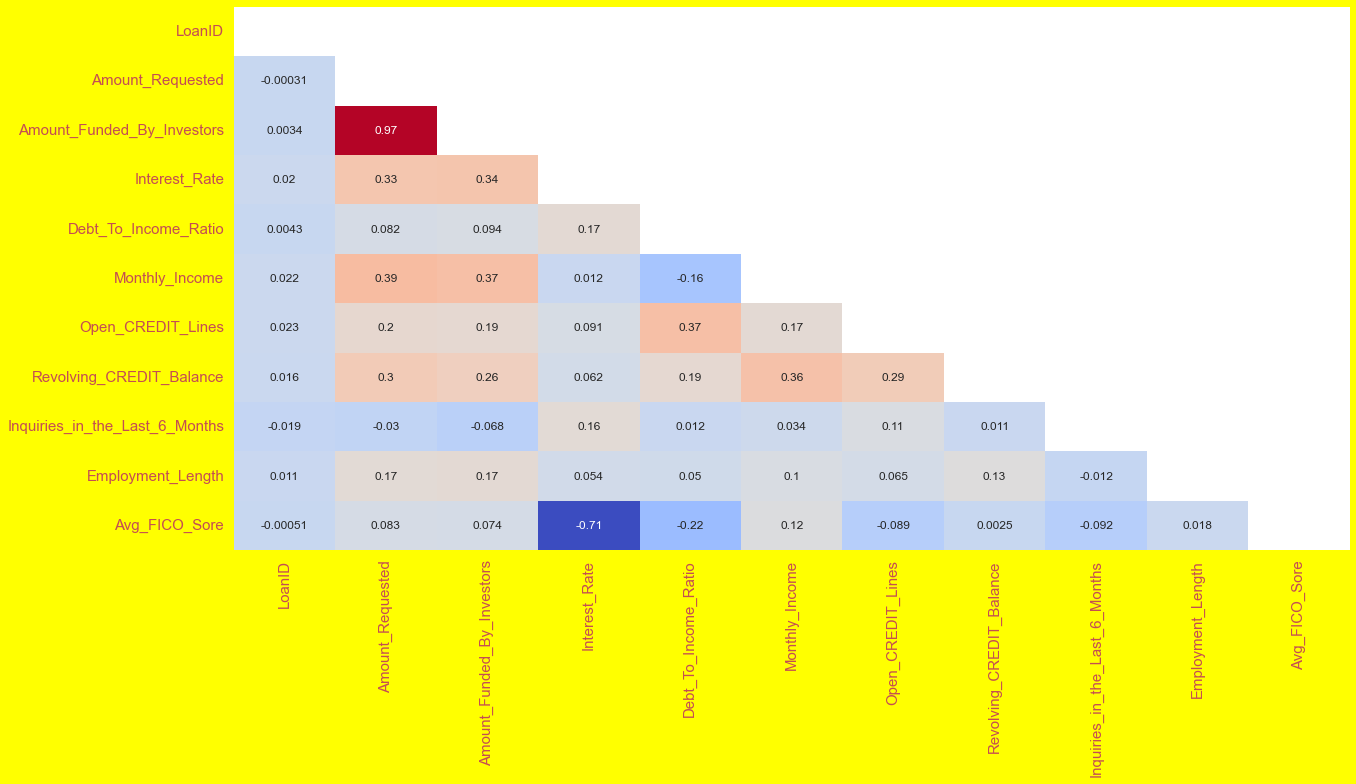

In [17]:
plt.figure(figsize=(20,10),facecolor='yellow')
sns.set(style='white')
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), cmap="coolwarm", cbar=False, annot = True,mask=mask)
plt.xticks(rotation=90,fontsize=15,color='r')
plt.yticks(rotation=0,fontsize=15,color='r')
plt.show()

## 2. Model Building Steps - Modeling Stage

In [18]:
import pandas_profiling as pf

In [19]:
Report=pf.ProfileReport(df)

In [20]:
#Report.to_file('Report.html')

In [21]:
df.drop(columns=['State','LoanID','Amount_Funded_By_Investors'],inplace=True)
# State has more category than 20 varaible
# LoanID is unique varible 
# Amount_funded_by_investors has more correlation with Amount_Requested 

### Handlign missing values 

In [22]:
def missing_values(x):
    if x.dtype == 'O':
        x[x=='unknown'] = np.nan
        if x.isna().mean()<0.2:
            x = x.fillna(x.mode()[0])  # step replaced by knn imputation
    else:
        x[x==999] = np.nan
        if x.isna().mean()<0.2:
            x = x.fillna(x.median())   # step replaced by knn imputation
    return x
df=df.apply(missing_values)

In [23]:
Unique_counts=df.nunique()
Null_counts = df.isnull().sum()
Not_null_counts=df.notnull().sum()
data_types = df.dtypes

# Combine the results into a single DataFrame
result = pd.concat([data_types,Unique_counts,Not_null_counts,Null_counts], axis=1, keys=['Data_Type','Unique_counts','Not_null','Num_Nulls'])

# Print the result
print(pd.DataFrame(result))

                               Data_Type  Unique_counts  Not_null  Num_Nulls
Amount_Requested                 float64            380      2500          0
Interest_Rate                    float64            275      2500          0
Loan_Length                       object              2      2500          0
Loan_Purpose                      object             14      2500          0
Debt_To_Income_Ratio             float64           1669      2500          0
Home_Ownership                    object              5      2500          0
Monthly_Income                   float64            632      2500          0
Open_CREDIT_Lines                float64             29      2500          0
Revolving_CREDIT_Balance         float64           2349      2500          0
Inquiries_in_the_Last_6_Months   float64             10      2500          0
Employment_Length                float64             10      2500          0
Avg_FICO_Sore                    float64             38      2500          0

In [24]:
def outliers(x):
    if ((x.dtype=='int')| (x.dtype=='float')):
        Q1=x.quantile(0.25)
        Q3=x.quantile(0.75)
        IQR=Q3-Q1
        x=x.clip(lower=Q1-1.5*IQR,upper=Q3+1.5*IQR)                                      
    else :
        x
    return x
df=df.apply(outliers)

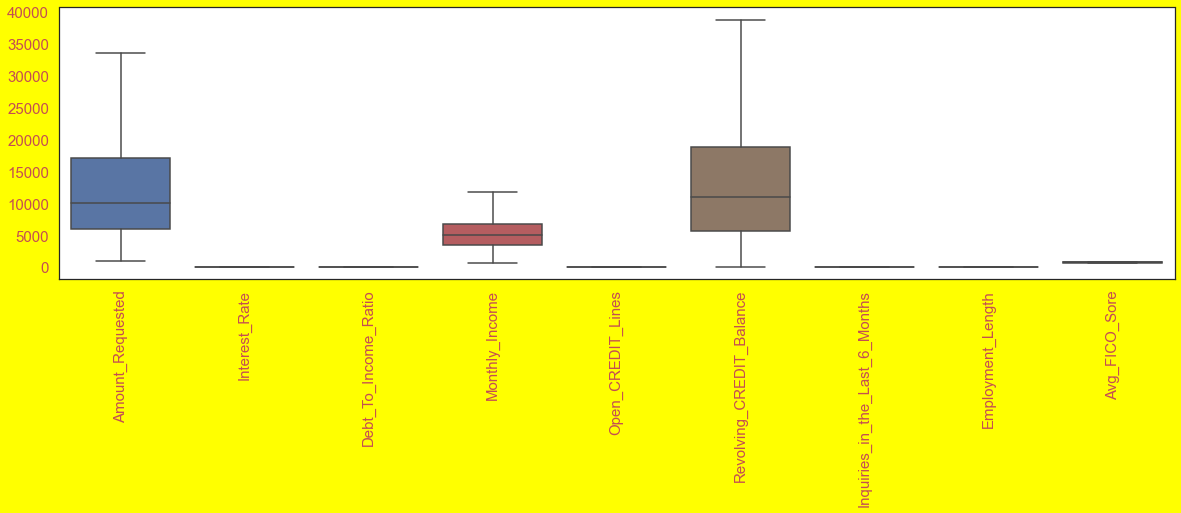

In [25]:
plt.figure(figsize=(20,5),facecolor='yellow')
sns.set(style='white')
sns.boxplot(data=df.select_dtypes(include=[int,float]))
plt.xticks(rotation=90,fontsize=15,color='r')
plt.yticks(rotation=0,fontsize=15,color='r')
plt.show()

### Converting categorical variables into numercal variables--- by Label encoding

In [26]:
for val in df.select_dtypes(include='object').columns:
    print('\n' + val )
    print('\n'+'number of Groups:', df[val].nunique())
    print('\n' + 'These are all different Groups:' ,'\n', df[val].value_counts())


Loan_Length

number of Groups: 2

These are all different Groups: 
 36     1952
60      548
Name: Loan_Length, dtype: int64

Loan_Purpose

number of Groups: 14

These are all different Groups: 
 debt_consolidation    1307
credit_card            444
other                  201
home_improvement       152
major_purchase         101
small_business          87
car                     50
wedding                 39
medical                 30
moving                  29
vacation                21
house                   20
educational             15
renewable_energy         4
Name: Loan_Purpose, dtype: int64

Home_Ownership

number of Groups: 5

These are all different Groups: 
 MORTGAGE    1148
RENT        1146
OWN          200
OTHER          5
NONE           1
Name: Home_Ownership, dtype: int64


In [27]:
df=pd.get_dummies(data=df,columns=['Loan_Purpose','Home_Ownership','Loan_Length'],drop_first=True)

In [28]:
uint8_cols = df.select_dtypes(['uint8']).columns

# Convert uint8 columns to integer and replace in DataFrame
df[uint8_cols] = df[uint8_cols].astype(int)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Amount_Requested                 2500 non-null   float64
 1   Interest_Rate                    2500 non-null   float64
 2   Debt_To_Income_Ratio             2500 non-null   float64
 3   Monthly_Income                   2500 non-null   float64
 4   Open_CREDIT_Lines                2500 non-null   float64
 5   Revolving_CREDIT_Balance         2500 non-null   float64
 6   Inquiries_in_the_Last_6_Months   2500 non-null   float64
 7   Employment_Length                2500 non-null   float64
 8   Avg_FICO_Sore                    2500 non-null   float64
 9   Loan_Purpose_credit_card         2500 non-null   int32  
 10  Loan_Purpose_debt_consolidation  2500 non-null   int32  
 11  Loan_Purpose_educational         2500 non-null   int32  
 12  Loan_Purpose_home_im

## Data Preparation-2 (Assumptions of the techniques)

#### Linear Regression (Normality/Linearity/No outliers/No Multicollinieirty/Homoscedasticity)

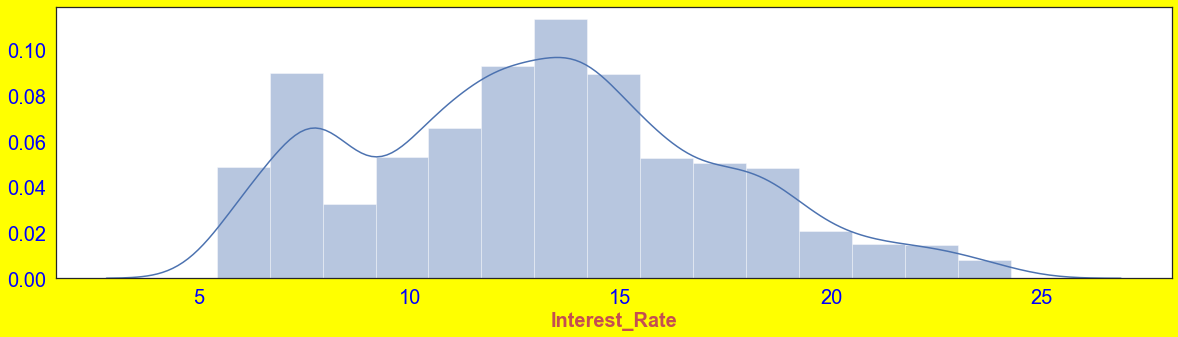

In [30]:
plt.figure(figsize=(20,5),facecolor='yellow')
sns.set(style='white') # distribution graph  and its a combination  pdf and histogram combination
sns.distplot(df.Interest_Rate,bins=15)        
plt.ylabel('',fontsize=20,color='r',fontweight='bold')
plt.xlabel('Interest_Rate',fontsize=20,color='r',fontweight='bold')# X-label
plt.xticks(rotation=0,fontsize=20,color='blue')
plt.yticks(rotation=0,fontsize=20,color='blue')
plt.show()# right skewness

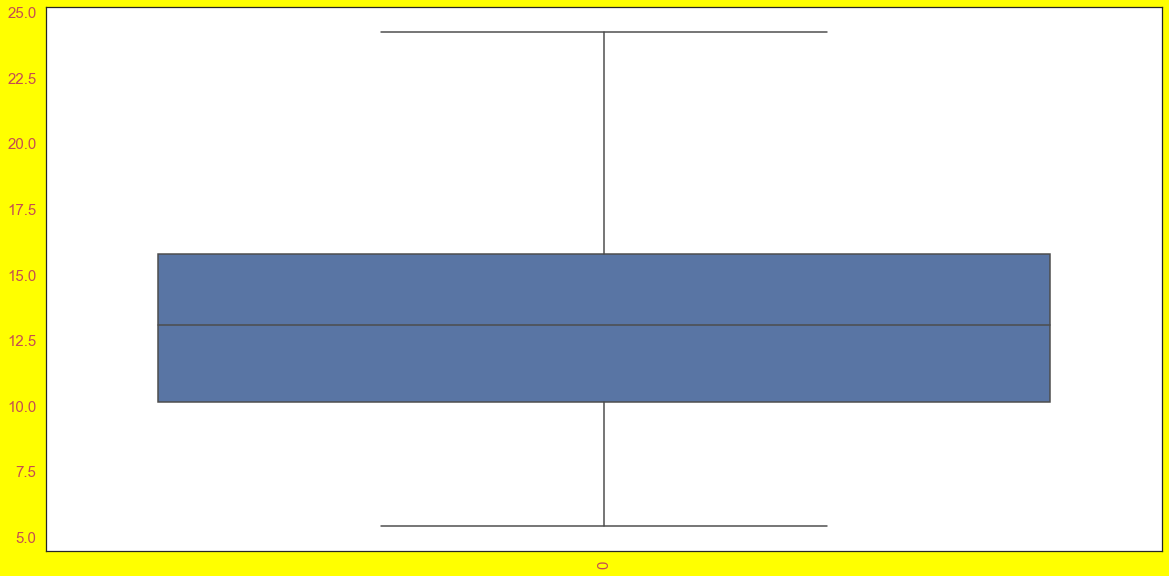

In [31]:
plt.figure(figsize=(20,10),facecolor='yellow')
sns.set(style='white')
sns.boxplot(data=df.Interest_Rate)
plt.xticks(rotation=90,fontsize=15,color='r')
plt.yticks(rotation=0,fontsize=15,color='r')
plt.show()

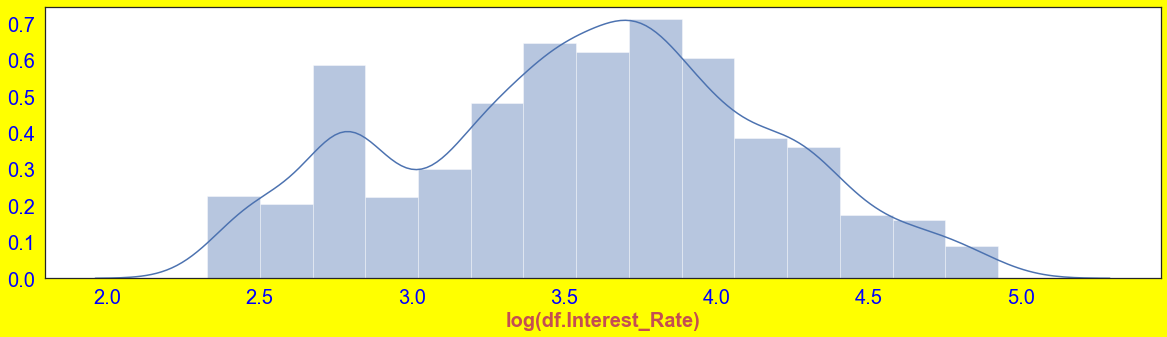

In [32]:
plt.figure(figsize=(20,5),facecolor='yellow')
sns.set(style='white') # distribution graph  and its a combination  pdf and histogram combination
sns.distplot(np.sqrt(df.Interest_Rate),bins=15)      
plt.ylabel('',fontsize=20,color='r',fontweight='bold')
plt.xlabel('sqrt(df.Interest_Rate)',fontsize=20,color='r',fontweight='bold')# X-label
plt.xticks(rotation=0,fontsize=20,color='blue')
plt.yticks(rotation=0,fontsize=20,color='blue')
plt.show()

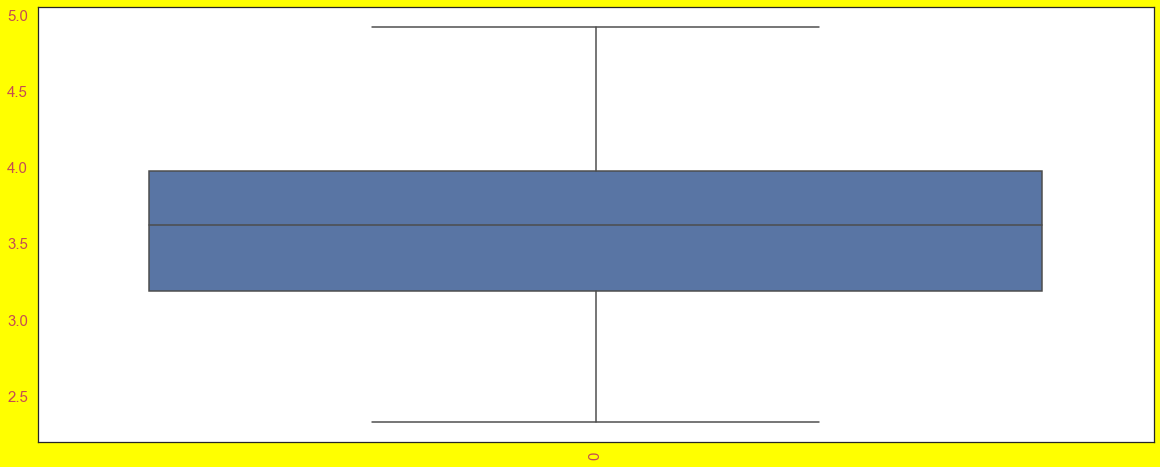

In [33]:
plt.figure(figsize=(20,8),facecolor='yellow')
sns.set(style='white')
sns.boxplot(data=np.sqrt(df.Interest_Rate))
plt.xticks(rotation=90,fontsize=15,color='r')
plt.yticks(rotation=0,fontsize=15,color='r')
plt.show()

In [34]:
df['sqrt_Interest_Rate'] = np.sqrt(df.Interest_Rate)
df.drop('Interest_Rate',axis=1,inplace=True)

### Checking Linearity

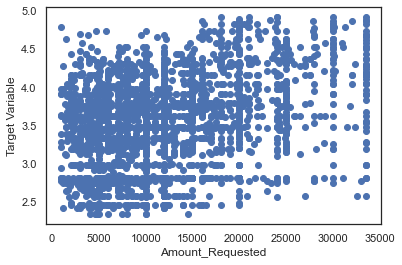

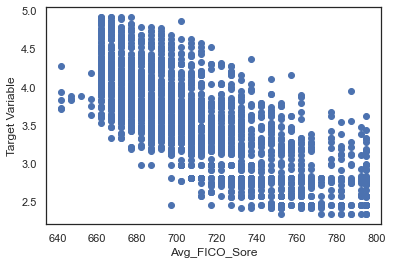

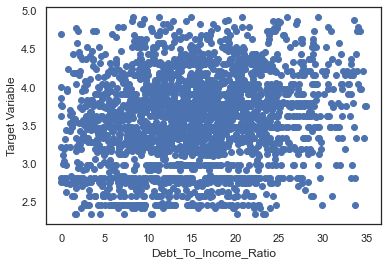

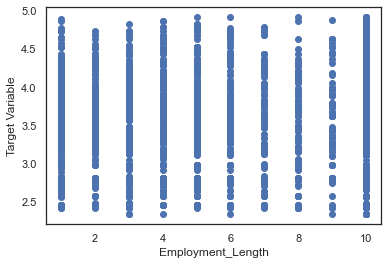

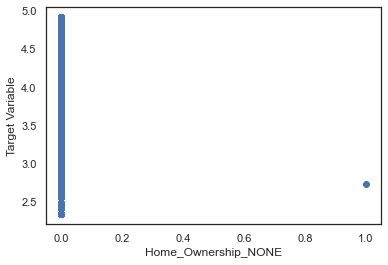

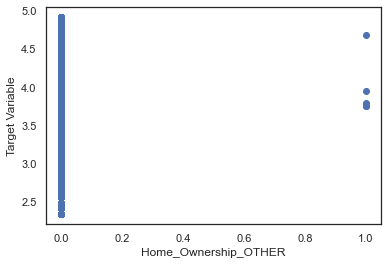

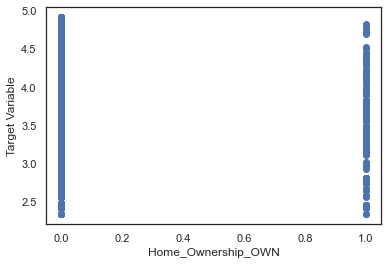

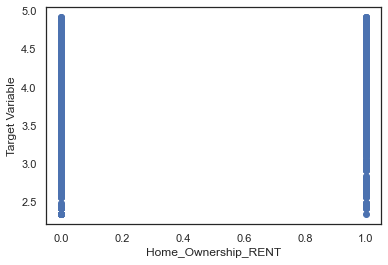

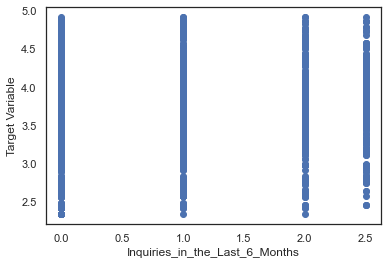

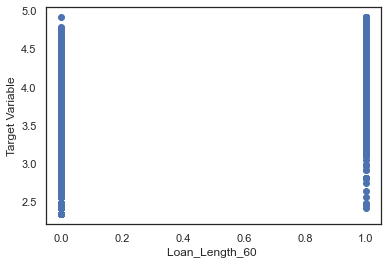

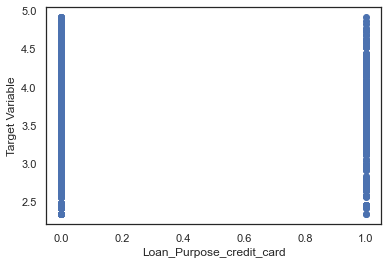

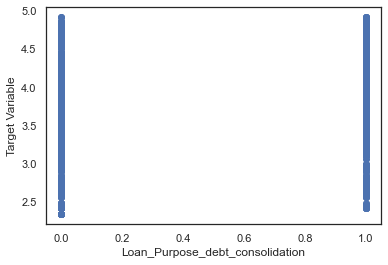

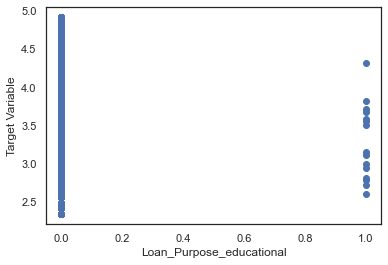

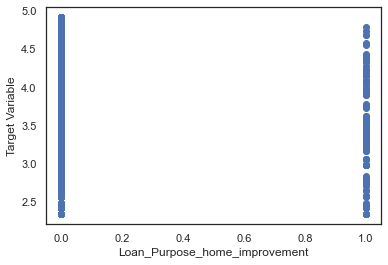

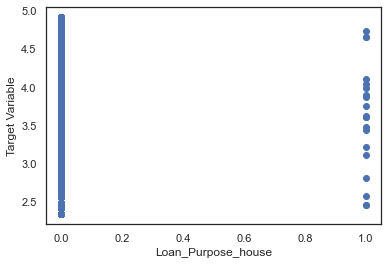

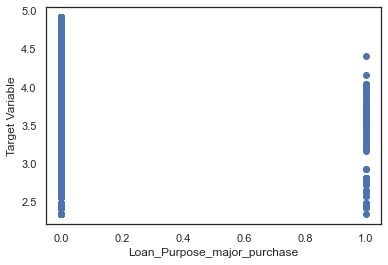

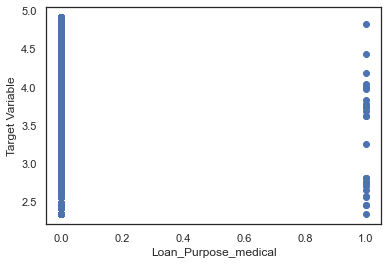

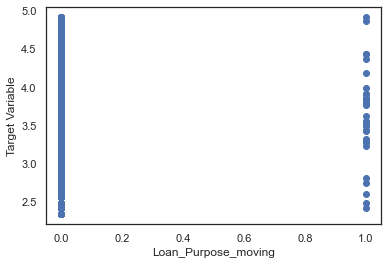

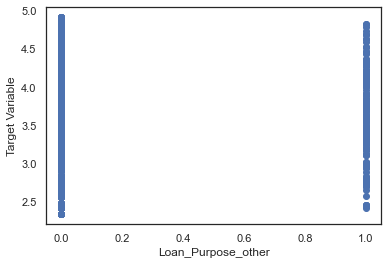

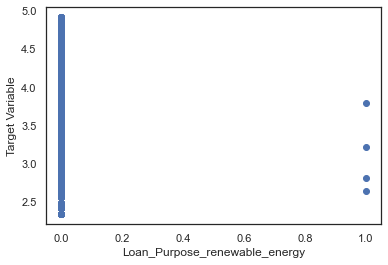

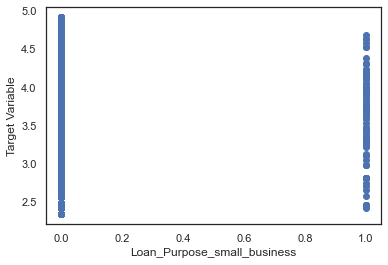

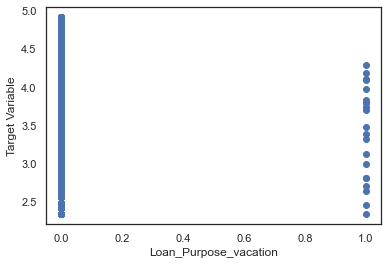

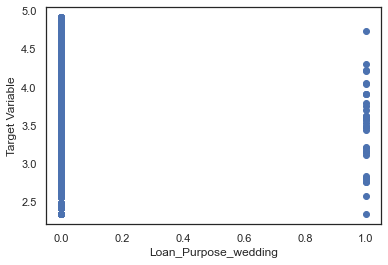

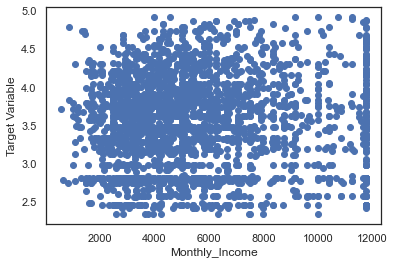

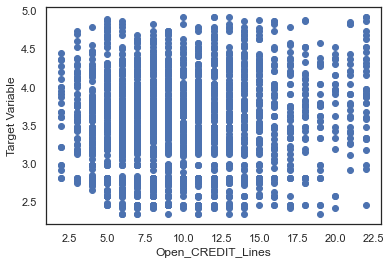

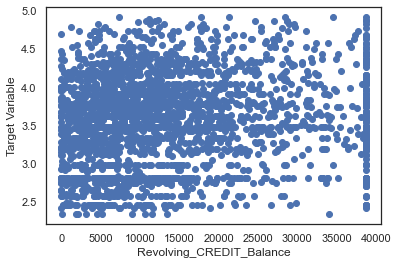

In [35]:
target = df['sqrt_Interest_Rate']
independent_vars = df[df.columns.difference(['sqrt_Interest_Rate'])]
# Create scatter plots of each independent variable against the target variable
for column in independent_vars.columns:
    plt.scatter(independent_vars[column], target)
    plt.xlabel(column)
    plt.ylabel('Target Variable')
    plt.show()

# Data Preparation-3 (Feature selection/Feature engineering/Feature identification)

In [36]:
corre_y2=df.corrwith(df.sqrt_Interest_Rate)
corre_y2.to_csv('corre_y2.csv')

In [37]:
corre_y2_df=abs(corre_y2).reset_index()
corre_y2_df.columns = ['Variable', 'Correlation']

In [38]:
corre_y2_df=corre_y2_df.sort_values(by='Correlation',ascending=False)
corre_y2_df

,Variable,Correlation
26,sqrt_Interest_Rate,1.000000
7,Avg_FICO_Sore,0.733402
25,Loan_Length_60,0.406781
0,Amount_Requested,0.319076
5,Inquiries_in_the_Last_6_Months,0.195204
1,Debt_To_Income_Ratio,0.177027
4,Revolving_CREDIT_Balance,0.138649
9,Loan_Purpose_debt_consolidation,0.133297
13,Loan_Purpose_major_purchase,0.112046
11,Loan_Purpose_home_improvement,0.094968


In [39]:
corr_variables=corre_y2_df['Variable'][corre_y2_df.Correlation>=0.1].unique()
corr_variables

array(['sqrt_Interest_Rate', 'Avg_FICO_Sore', 'Loan_Length_60 ',
       'Amount_Requested', 'Inquiries_in_the_Last_6_Months',
       'Debt_To_Income_Ratio', 'Revolving_CREDIT_Balance',
       'Loan_Purpose_debt_consolidation', 'Loan_Purpose_major_purchase'],
      dtype=object)

In [40]:
df[corr_variables].apply(lambda x:np.std(x)/np.mean(x))

sqrt_Interest_Rate                 0.164075
Avg_FICO_Sore                      0.048548
Loan_Length_60                     1.887338
Amount_Requested                   0.623295
Inquiries_in_the_Last_6_Months     1.150616
Debt_To_Income_Ratio               0.487767
Revolving_CREDIT_Balance           0.774075
Loan_Purpose_debt_consolidation    0.955394
Loan_Purpose_major_purchase        4.873651
dtype: float64

## Multicolinieity by VIF

In [41]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [42]:
y = df['sqrt_Interest_Rate']
X = df[df[corr_variables].columns.difference(['sqrt_Interest_Rate','Amount_Requested','Debt_To_Income_Ratio'])]

In [43]:
# Calculate the VIF for each independent variable
vif = pd.DataFrame()
vif["variables"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Print the VIF for each independent variable
print(vif)

                         variables       VIF
0                    Avg_FICO_Sore  4.578426
1   Inquiries_in_the_Last_6_Months  1.743539
2                  Loan_Length_60   1.306102
3  Loan_Purpose_debt_consolidation  2.192433
4      Loan_Purpose_major_purchase  1.105148
5         Revolving_CREDIT_Balance  2.724940


In [44]:
vif['variables'].unique()

array(['Avg_FICO_Sore', 'Inquiries_in_the_Last_6_Months',
       'Loan_Length_60 ', 'Loan_Purpose_debt_consolidation',
       'Loan_Purpose_major_purchase', 'Revolving_CREDIT_Balance'],
      dtype=object)

In [45]:
df_final=df[['Avg_FICO_Sore', 'Inquiries_in_the_Last_6_Months',
       'Loan_Length_60 ', 'Loan_Purpose_debt_consolidation',
       'Loan_Purpose_major_purchase', 'Revolving_CREDIT_Balance','sqrt_Interest_Rate']]

In [46]:
df_final

,Avg_FICO_Sore,Inquiries_in_the_Last_6_Months,Loan_Length_60,Loan_Purpose_debt_consolidation,Loan_Purpose_major_purchase,Revolving_CREDIT_Balance,sqrt_Interest_Rate
0,737.0,2.0,0,1,0,14272.0,2.983287
1,717.0,1.0,0,1,0,11140.0,3.481379
2,692.0,1.0,1,1,0,21977.0,4.688283
3,697.0,0.0,0,1,0,9346.0,3.160696
4,697.0,0.0,0,0,0,14469.0,3.421988
...,...,...,...,...,...,...,...
2495,707.0,1.0,1,1,0,38725.5,4.095119
2496,742.0,1.0,1,0,0,18898.0,3.753665
2497,682.0,0.0,0,1,0,4544.0,3.740321
2498,677.0,0.0,0,0,1,7753.0,3.524202


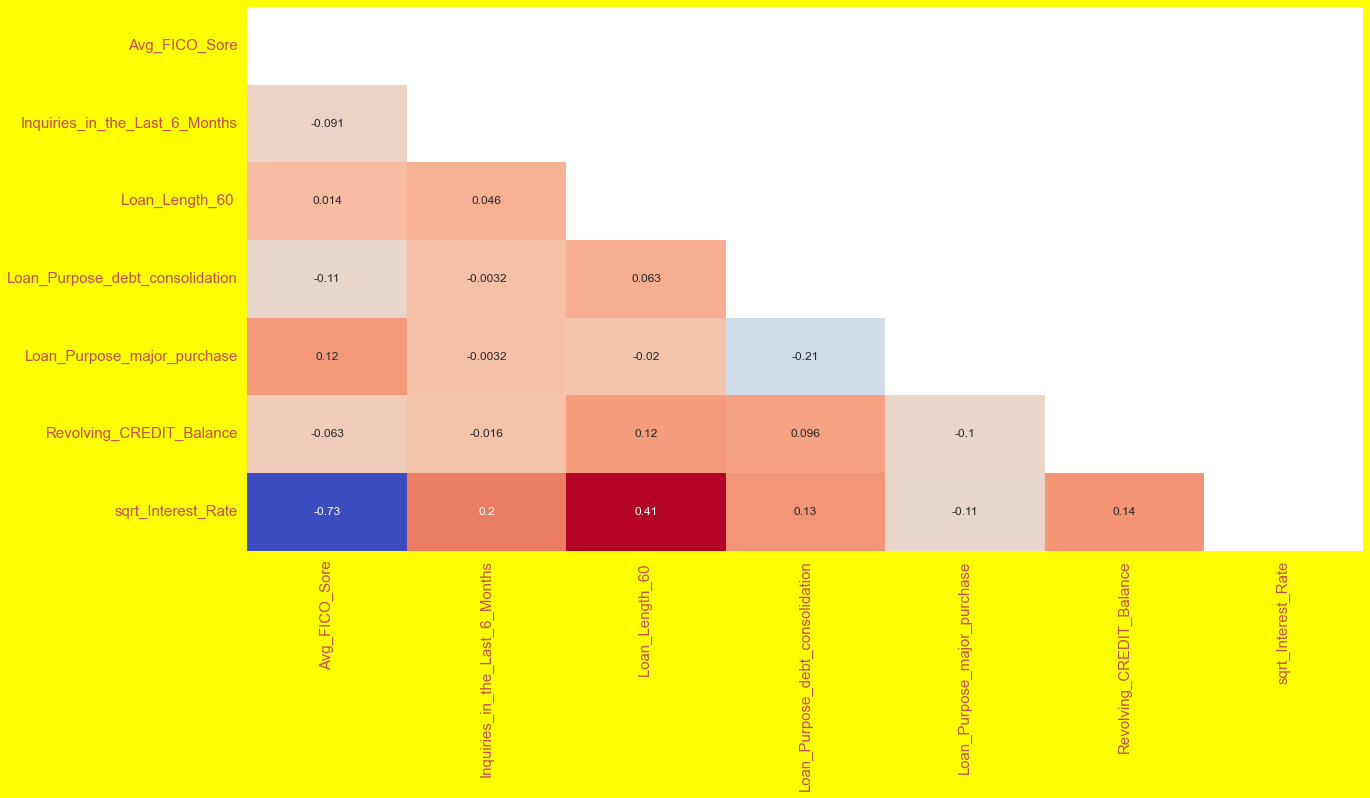

In [47]:
plt.figure(figsize=(20,10),facecolor='yellow')
sns.set(style='white')
mask = np.triu(np.ones_like(df_final.corr(), dtype=bool))
sns.heatmap(df_final.corr(), cmap="coolwarm", cbar=False, annot = True,mask=mask)
plt.xticks(rotation=90,fontsize=15,color='r')
plt.yticks(rotation=0,fontsize=15,color='r')
plt.show()

# Data Preparation-4

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
y=target = df_final[['sqrt_Interest_Rate']]
X=features =df_final[df_final.columns.difference(['sqrt_Interest_Rate','Loan_Purpose_major_purchase','Loan_Purpose_debt_consolidation'])]

In [50]:
train_X, test_X, train_y, test_y= train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [51]:
import statsmodels.api as sm

In [52]:
train_X_wc=sm.add_constant(train_X)
train_X_wc.head(5)

,const,Avg_FICO_Sore,Inquiries_in_the_Last_6_Months,Loan_Length_60,Revolving_CREDIT_Balance
326,1.0,682.0,2.5,0,8414.0
1818,1.0,757.0,2.0,0,22725.0
751,1.0,722.0,0.0,0,3295.0
545,1.0,687.0,1.0,1,14392.0
198,1.0,727.0,0.0,0,12217.0


In [53]:
test_X_wc=sm.add_constant(test_X)
test_X_wc.head(5)

,const,Avg_FICO_Sore,Inquiries_in_the_Last_6_Months,Loan_Length_60,Revolving_CREDIT_Balance
1247,1.0,662.0,1.0,0,6309.0
489,1.0,707.0,2.0,0,10770.0
1161,1.0,742.0,1.0,0,4421.0
2121,1.0,682.0,0.0,0,11183.0
1780,1.0,747.0,0.0,0,38725.5


In [54]:
ols_model= sm.OLS(train_y, train_X_wc).fit()

#### Performing a summary operation lists out all the different parameters of the regression line fitted

In [55]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:     sqrt_Interest_Rate   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     1134.
Date:                Sat, 18 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:37:51   Log-Likelihood:                -439.88
No. Observations:                1750   AIC:                             889.8
Df Residuals:                    1745   BIC:                             917.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [56]:
ols_model.params

const                             12.154291
Avg_FICO_Sore                     -0.012438
Inquiries_in_the_Last_6_Months     0.077008
Loan_Length_60                     0.571309
Revolving_CREDIT_Balance           0.000002
dtype: float64

In [57]:
y_train_pred = (ols_model.predict(train_X_wc))
y_test_pred = (ols_model.predict(test_X_wc))
y_train_act = (train_y.sqrt_Interest_Rate)
y_test_act = (test_y.sqrt_Interest_Rate) 

In [58]:
Error=y_train_act - y_train_pred

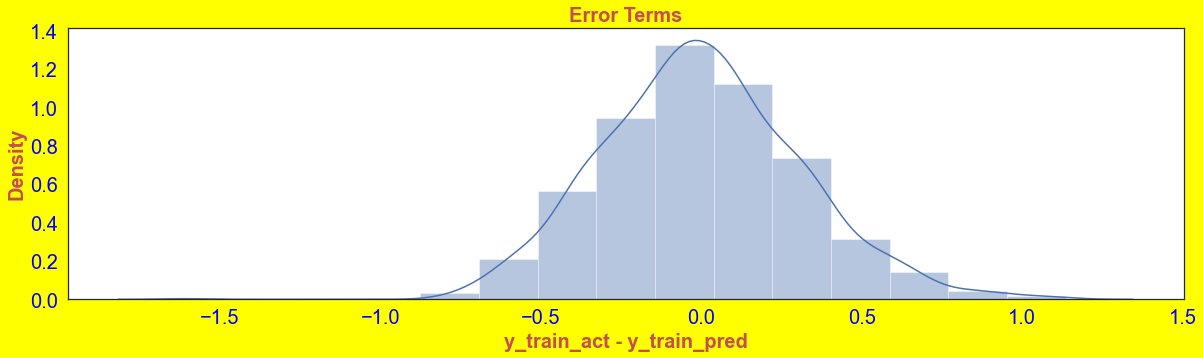

In [59]:
plt.figure(figsize=(20,5),facecolor='yellow')
sns.set(style='white') # distribution graph  and its a combination  pdf and histogram combination
sns.distplot(Error, bins = 15)
plt.title('Error Terms',fontsize=20,color='r',fontweight='bold')  # Plot heading           
plt.ylabel('Density',fontsize=20,color='r',fontweight='bold')
plt.xlabel('y_train_act - y_train_pred',fontsize=20,color='r',fontweight='bold')# X-label
plt.xticks(rotation=0,fontsize=20,color='blue')
plt.yticks(rotation=0,fontsize=20,color='blue')
plt.show()

In [60]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

### Looking at the RMSE

In [61]:
print('Train_RMSE' ,np.sqrt(mean_squared_error(y_train_act, y_train_pred)))
print('Test_RMSE' ,np.sqrt(mean_squared_error(y_test_act, y_test_pred)))

Train_RMSE 0.31111882337415986
Test_RMSE 0.29553398919875096


### Checking the R-squared

In [62]:
Train_r_squared=r2_score(y_train_act, y_train_pred)
Test_r_squared=r2_score(y_test_act, y_test_pred)
print('Train_R2',Train_r_squared)
print('Test R2',Test_r_squared)

Train_R2 0.7221886942933787
Test R2 0.7339942197655296


### Checking the Correlation

In [63]:
print('Train_corr:', np.corrcoef(y_train_act, y_train_pred)[1][0])
print('Test_corr:', np.corrcoef(y_test_act, y_test_pred)[1][0])

Train_corr: 0.8498168592663822
Test_corr: 0.8569261615755486


### Checking The MAPE

In [64]:
Train_Mean_absolute_percentage_error=r2_score(y_train_act, y_train_pred)
Test_Mean_absolute_percentage_error=r2_score(y_test_act, y_test_pred)
print('Train_MAPE',Train_Mean_absolute_percentage_error)
print('Test_MAPE',Test_Mean_absolute_percentage_error)

Train_MAPE 0.7221886942933787
Test_MAPE 0.7339942197655296


In [65]:
df_final.head(5)

,Avg_FICO_Sore,Inquiries_in_the_Last_6_Months,Loan_Length_60,Loan_Purpose_debt_consolidation,Loan_Purpose_major_purchase,Revolving_CREDIT_Balance,sqrt_Interest_Rate
0,737.0,2.0,0,1,0,14272.0,2.983287
1,717.0,1.0,0,1,0,11140.0,3.481379
2,692.0,1.0,1,1,0,21977.0,4.688283
3,697.0,0.0,0,1,0,9346.0,3.160696
4,697.0,0.0,0,0,0,14469.0,3.421988
